In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datasets=['social_media', 'salary', 'student_marks', 'study_time', 'income', 
         'headbrain', 'fitness']
folders = {'bc1':'output20240902bc1', 'opt1':'output20240911opt1', 
           'bc2':'output20220524bc2', 'opt2':'output20240924opt2'}
names = {'bc1':'_boosting.txt', 'opt1':'_optimization.txt', 
         'bc2':'_boosting2_no_priority_sym_ind_reg0tl1000col10.txt', 
         'opt2':'_opt2_no_priority_sym_ind_950_reg0tl200col10.txt'}

In [3]:
data_trains={}
data_tests={}
for dataset in datasets:
    print(dataset)
    all_trains={}
    all_tests={}
    for algo in folders:
        f = open('../'+folders[algo]+'/'+dataset+names[algo], 'r')
        lines = f.readlines()
        start=False
        i=0
        trains=[]
        tests=[]
        for line in lines:
            if 'num' in line and 'test' in line and 'train' in line:
                start=True
                continue
            if start and (i<10 and 'bc' in algo or i<30 and 'opt' in algo):
                words = line.split(' ')
                train = float(words[-1])
                test = float(words[-2])
                if 'opt' in algo and i%3==2:
                    trains.append(train)
                    tests.append(test)
                elif 'bc' in algo:
                    trains.append(train)
                    tests.append(test)
                i+=1
        f.close()
        all_trains[algo]=trains
        all_tests[algo]=tests
    data_trains[dataset]=all_trains
    data_tests[dataset]=all_tests
data_trains, data_tests

social_media
salary
student_marks
study_time
income
headbrain
fitness


({'social_media': {'bc1': [22.983815789473674,
    19.083190789473687,
    17.574481648199445,
    16.274273314866118,
    15.016267774699905,
    14.58881180534181,
    14.438561759173759,
    14.304117314729313,
    14.229418145754243,
    14.229418145754243],
   'opt1': [33.8975,
    22.177987804878043,
    16.977154471544694,
    15.151481481481477,
    14.569859649122796,
    14.368192982456126,
    14.195074328187541,
    14.095466472303201,
    14.020680119581465,
    13.976210563882944],
   'bc2': [22.983815789473674,
    19.083190789473687,
    17.57448164819945,
    16.274273314866118,
    15.016267774699907,
    14.588811805341813,
    14.438561759180697,
    14.304117314736253,
    14.2294181457514,
    14.2294181457514],
   'opt2': [33.8975,
    22.177987804878043,
    16.977154471544697,
    15.151481481481488,
    14.601025641025648,
    14.39935897435896,
    14.229015151515153,
    14.142285067873306,
    14.056917293233084,
    13.96005717552887]},
  'salary': {'bc1':

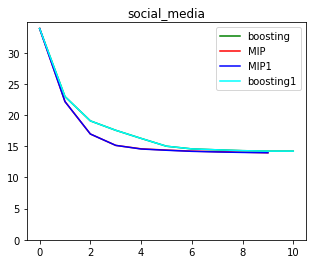

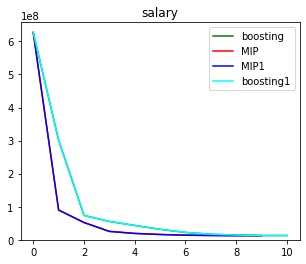

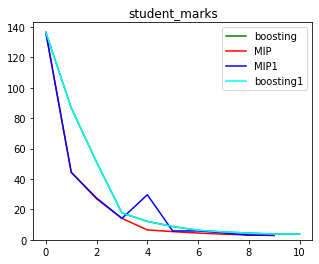

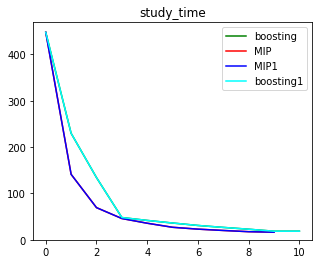

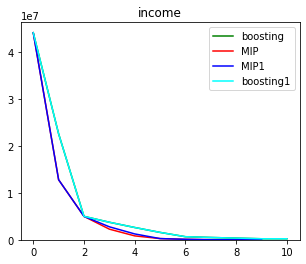

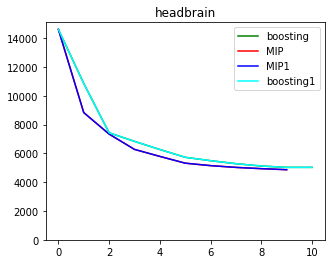

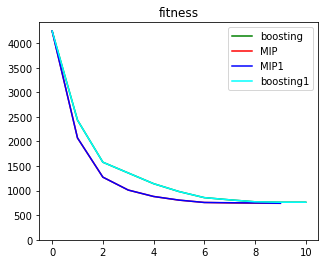

In [5]:
colours={'bc1':'cyan', 'opt1':'blue', 
           'bc2':'green', 'opt2':'red'}
names={'bc1':'boosting1','opt1':'MIP1','bc2': 'boosting', 'opt2': 'MIP'}
for dataset in datasets:
    plt.figure(figsize=(5,4))
    for algo in {'bc1', 'opt1', 'bc2', 'opt2'}:
        if 'bc' in algo:
            plt.plot(list(range(len(data_trains[dataset][algo])+1)), [data_trains[dataset]['opt2'][0]]+data_trains[dataset][algo], colours[algo], label=names[algo])
        else:
            plt.plot(list(range(len(data_trains[dataset][algo]))), data_trains[dataset][algo], colours[algo], label=names[algo])
#         plt.plot(list(range(10)), data_tests[dataset][algo], colours[algo], label=algo)
    plt.legend()
    plt.ylim(bottom=0)
    plt.title(dataset)

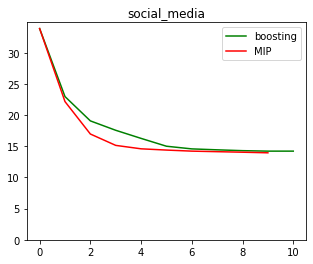

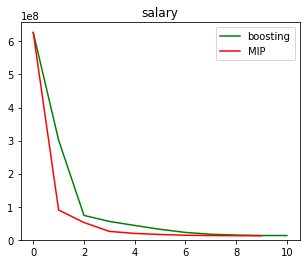

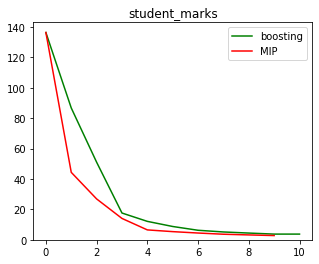

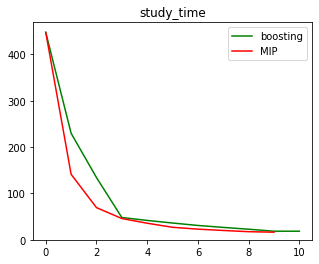

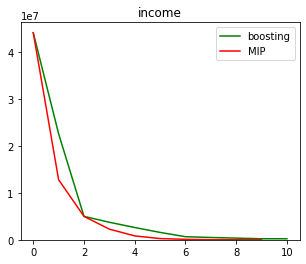

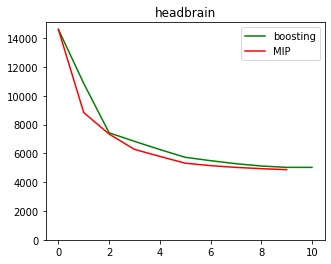

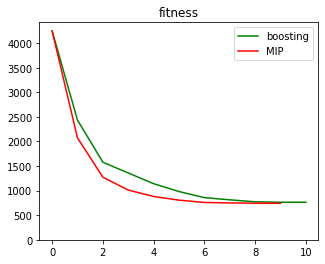

In [6]:
colours={'bc1':'cyan', 'opt1':'blue', 
           'bc2':'green', 'opt2':'red'}
names={'bc2': 'boosting', 'opt2': 'MIP'}
for dataset in datasets:
    plt.figure(figsize=(5,4))
    for algo in {'bc2', 'opt2'}:
        if 'bc' in algo:
            plt.plot(list(range(len(data_trains[dataset][algo])+1)), [data_trains[dataset]['opt2'][0]]+data_trains[dataset][algo], colours[algo], label=names[algo])
        else:
            plt.plot(list(range(len(data_trains[dataset][algo]))), data_trains[dataset][algo], colours[algo], label=names[algo])
#         plt.plot(list(range(10)), data_tests[dataset][algo], colours[algo], label=algo)
    plt.legend()
    plt.ylim(bottom=0)
    plt.title(dataset)

In [5]:
print('Largest risk reduction difference between the boosting solution and optimal solution')
print()
print("dataset\t\t\ttrain risk")
print('-----------------------------------------')
for dataset in datasets:
    bc=np.array([data_trains[dataset]['opt2'][0]]+data_trains[dataset]['bc2'][:-1])
    opt = np.array(data_trains[dataset]['opt2'])
    print(rf'{dataset:15s}'+"\t\t"+rf"{(max(bc-opt)/data_trains[dataset]['opt2'][0]*100):.3f}%")

Largest risk reduction difference between the boosting solution and optimal solution

dataset			train risk
-----------------------------------------
social_media   		7.148%
salary         		33.705%
student_marks  		31.067%
study_time     		19.781%
income         		22.188%
headbrain      		13.869%
fitness        		8.537%
